## imports

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/randy/anaconda/envs/play/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## data pull

In [2]:
# You will need access to D4D data.world organization. Check in slack for more info
# 150mb / 240k rows. Give it time, has to download over internet
df = pd.read_csv('https://query.data.world/s/bbokc1f08to11j19j5axvkrcv', sep='\t', parse_dates=['date'])

## exploring data

In [5]:
df.head()

,date,author,title,lead,category,hrefs
0,2016-12-30 16:05:19,Pam Key,Bolton: Putin Is Smart,,california,['https://twitter.com/pamkeyNEN']
1,2016-12-31 08:02:52,Ian Hanchett,Obama: ‘We’ve Made Extraordinary Progress’ Ove...,,california,['https://twitter.com/IanHanchett']
2,2016-12-30 12:06:10,Ian Hanchett,Dem Rep Schiff: Obama Waited Too Long to Take ...,,california,"['https://grabien.com/story.php?id=80835', 'ht..."
3,2016-12-27 13:08:19,Adelle Nazarian,CA Universities Named Among ‘Worst Colleges fo...,Nine out of the 40 colleges named in a Jewish ...,california,['https://www.algemeiner.com/the-40-worst-coll...
4,2016-12-28 05:59:27,Joel B. Pollak,Water-Starved Central Valley Says ‘Good Riddan...,Sen. Barbara Boxer (D-CA) is retiring after 24...,california,['http://www.fresnobee.com/news/politics-gover...


In [101]:
df_sample = df.copy().head(10000)

In [102]:
df_sample.iloc[10,:]

date                                      2016-12-29 00:01:14
author                               Assemblyman Tim Donnelly
title        Top 10 Stupidest New Laws in California for 2017
lead        I’m not in the habit of complaining at the out...
category                                           california
hrefs       ['http://mynewsla.com/government/2016/12/27/ce...
Name: 10, dtype: object

### 1. Generate word counts in article leads across the whole datasets (filtering stopwords)


In [103]:
from nltk.corpus import stopwords
from nltk import download
download("stopwords")

[nltk_data] Downloading package stopwords to /Users/randy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [159]:
stop_word_set = set(stopwords.words('english'))

In [104]:
# create a test lead and test word to try out a solution
test_lead = df_sample.loc[10,'lead']
test_array = np.array(test_lead.split())


In [184]:
print(stop_word_set)

{'weren', 'your', 'having', 'during', 'him', 'whom', 'then', 'other', 'their', 'no', 'y', 'her', 'they', 'from', 'isn', 'them', 't', 'both', 're', 'so', 'because', 'on', 'an', 'those', 'when', 's', 'had', 'you', 'some', 'haven', 'few', 'can', 'just', 'nor', 'ma', 'theirs', 'further', 'why', 'couldn', 'until', 'over', 'hadn', 'own', 'ours', 'ain', 'aren', 'who', 'is', 'have', 'he', 'than', 'such', 'herself', 'should', 'below', 'to', 'don', 'if', 'a', 'mustn', 'd', 'she', 'my', 'very', 'up', 'but', 'm', 'were', 'how', 'am', 'shan', 'doing', 'most', 'its', 'be', 'after', 'or', 'now', 'did', 'our', 'has', 'any', 'won', 'being', 'do', 'mightn', 'does', 'into', 'as', 'this', 'myself', 'for', 'and', 'me', 'his', 'it', 'needn', 'once', 'we', 'hers', 'at', 'i', 'here', 'doesn', 'before', 'by', 'yourselves', 'too', 'down', 'more', 'out', 'himself', 'of', 'itself', 'themselves', 'that', 'in', 'off', 'yourself', 'been', 'again', 'only', 'each', 'between', 'o', 'all', 'are', 'hasn', 'ourselves', 't

In [186]:
for word in test_array:
    print("{} \t\t\t {}".format(word, word in stop_word_set))

I’m 			 False
not 			 True
in 			 True
the 			 True
habit 			 False
of 			 True
complaining 			 False
at 			 True
the 			 True
outset 			 False
of 			 True
a 			 True
column, 			 False
but 			 True
I’ve 			 False
taken 			 False
on 			 True
a 			 True
nearly 			 False
impossible 			 False
task 			 False
— 			 False
figuring 			 False
out 			 True
which, 			 False
of 			 True
the 			 True
hundreds 			 False
of 			 True
new 			 False
California 			 False
laws 			 False
about 			 True
to 			 True
go 			 False
into 			 True
effect, 			 False
are 			 True
the 			 True
stupidest. 			 False


In [165]:
%%time 
np.in1d(test_array, stopwords.words('english'))

CPU times: user 1.72 ms, sys: 2.55 ms, total: 4.27 ms
Wall time: 8.41 ms


array([False,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False,  True,  True, False], dtype=bool)

In [167]:
%%time 
np.in1d(test_array, stop_word_set)

CPU times: user 155 µs, sys: 1e+03 ns, total: 156 µs
Wall time: 165 µs


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False], dtype=bool)

In [187]:
sum(np.in1d(test_array, stopwords.words('english')))

20

In [200]:
#import numpy as np

list1 = np.array([1, 2, 3, 49])
list2 = np.array([1, 2, 3, 4])

msk1 = {49, 26, 28} & set(list1)
# => True

msk2 = any(list1 & set(list2))

TypeError: unsupported operand type(s) for &: 'int' and 'set'

In [195]:
msk2

False

In [188]:
sum(np.in1d(test_array, stop_word_set))

0

In [267]:
## create a function

def wd_ct(lead):
    lead_array = np.array(lead.split())
    #print(lead_array)
#    stop_word_set = set(stopwords.words('english'))
    wd_ct_wo_stopwords = sum(np.in1d(lead_array, stopwords.words('english')))
    return(wd_ct_wo_stopwords)


def wd_ct_np(word):
    print('a')
def test_func(int_val):
    return int_val+3



In [251]:
a = 'the barn door'

In [262]:
b = ([1,4,6,3])
np.apply_along_axis(test_func, 0, b)

test_func = np.vectorize(wd_ct)
f = np.vectorize(wd_ct, otypes=[np.float])
f(b)

AttributeError: 'numpy.int64' object has no attribute 'split'

In [259]:
test_lead

'I’m not in the habit of complaining at the outset of a column, but I’ve taken on a nearly impossible task — figuring out which, of the hundreds of new California laws about to go into effect, are the stupidest.'

In [268]:
wd_ct(test_lead)

20

## use apply function for DF


In [111]:
df_sample['wd_ct_nostop'] = df_sample['lead'].apply(wd_ct)

In [112]:
df_sample.head()

,date,author,title,lead,category,hrefs,wd_ct_nostop
0,2016-12-30 16:05:19,Pam Key,Bolton: Putin Is Smart,,california,['https://twitter.com/pamkeyNEN'],0
1,2016-12-31 08:02:52,Ian Hanchett,Obama: ‘We’ve Made Extraordinary Progress’ Ove...,,california,['https://twitter.com/IanHanchett'],0
2,2016-12-30 12:06:10,Ian Hanchett,Dem Rep Schiff: Obama Waited Too Long to Take ...,,california,"['https://grabien.com/story.php?id=80835', 'ht...",0
3,2016-12-27 13:08:19,Adelle Nazarian,CA Universities Named Among ‘Worst Colleges fo...,Nine out of the 40 colleges named in a Jewish ...,california,['https://www.algemeiner.com/the-40-worst-coll...,12
4,2016-12-28 05:59:27,Joel B. Pollak,Water-Starved Central Valley Says ‘Good Riddan...,Sen. Barbara Boxer (D-CA) is retiring after 24...,california,['http://www.fresnobee.com/news/politics-gover...,17


In [128]:
# most frequent authors
df_sample['author'].value_counts().head()

Adelle Nazarian     1549
Joel B. Pollak      1339
Chriss W. Street    1207
William Bigelow     1200
Michelle Moons       976
Name: author, dtype: int64

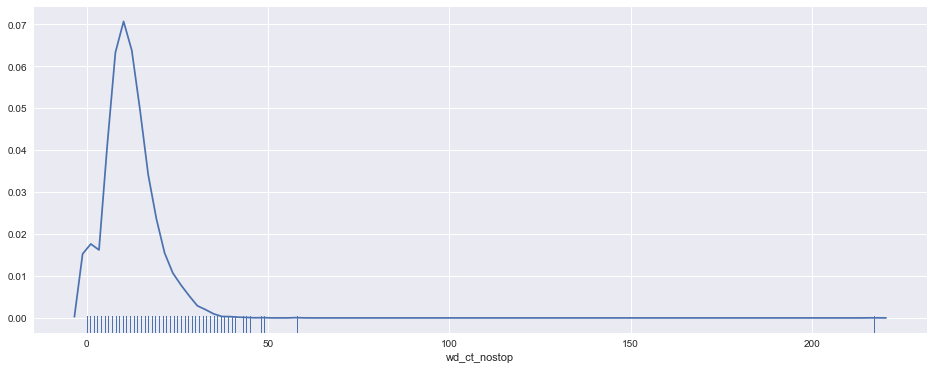

In [123]:
plt.figure(figsize=(16,6))
sns.distplot(df_sample['wd_ct_nostop'], hist=False, rug=True);

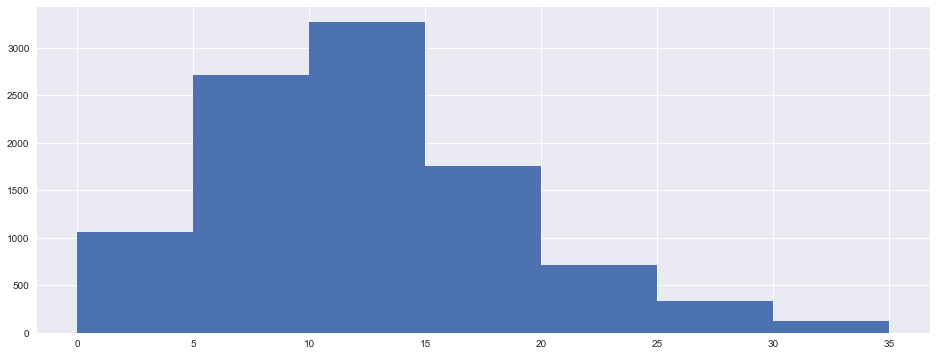

In [122]:
plt.figure(figsize=(16,6))
plt.hist(df_sample['wd_ct_nostop'], bins=[0,5,10,15,20,25,30,35])
plt.show()

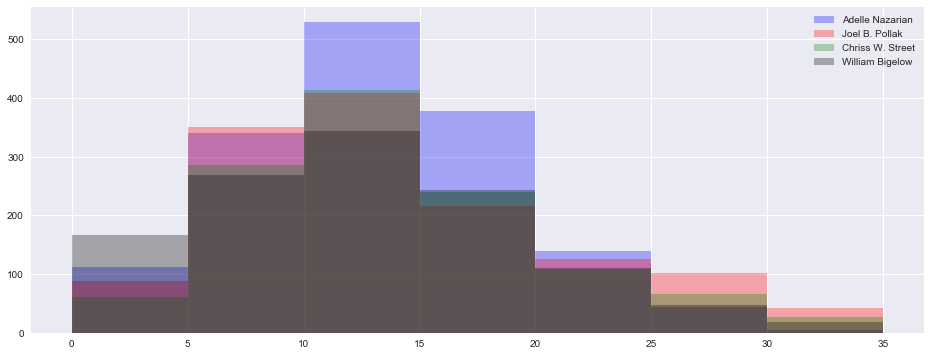

In [137]:
plt.figure(figsize=(16,6))
plt.hist(df_sample[df_sample['author'] == 'Adelle Nazarian']['wd_ct_nostop'], bins=[0,5,10,15,20,25,30,35], color='blue', alpha=.3, label='Adelle Nazarian')
plt.hist(df_sample[df_sample['author'] == 'Joel B. Pollak']['wd_ct_nostop'], bins=[0,5,10,15,20,25,30,35], color='red', alpha=.3, label='Joel B. Pollak')
plt.hist(df_sample[df_sample['author'] == 'Chriss W. Street']['wd_ct_nostop'], bins=[0,5,10,15,20,25,30,35], color='green', alpha=.3, label='Chriss W. Street')
plt.hist(df_sample[df_sample['author'] == 'William Bigelow']['wd_ct_nostop'], bins=[0,5,10,15,20,25,30,35], color='black', alpha=.3, label='William Bigelow')
plt.legend()
plt.title('Dist of 4 most frequent authors lead word count)
plt.show()

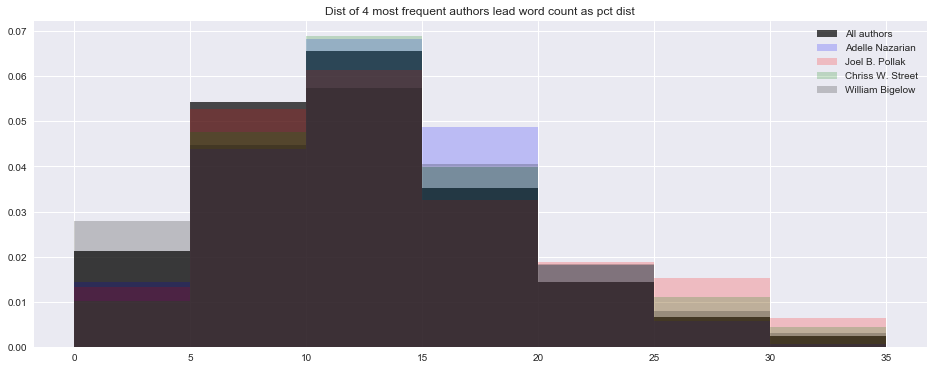

In [143]:
plt.figure(figsize=(16,6))
plt.hist(df_sample['wd_ct_nostop'], bins=[0,5,10,15,20,25,30,35], color='black', alpha=.7, label='All authors', normed=True)


plt.hist(df_sample[df_sample['author'] == 'Adelle Nazarian']['wd_ct_nostop'], bins=[0,5,10,15,20,25,30,35], color='blue', alpha=.2, label='Adelle Nazarian', normed=True)
plt.hist(df_sample[df_sample['author'] == 'Joel B. Pollak']['wd_ct_nostop'], bins=[0,5,10,15,20,25,30,35], color='red', alpha=.2, label='Joel B. Pollak', normed=True)
plt.hist(df_sample[df_sample['author'] == 'Chriss W. Street']['wd_ct_nostop'], bins=[0,5,10,15,20,25,30,35], color='green', alpha=.2, label='Chriss W. Street', normed=True)
plt.hist(df_sample[df_sample['author'] == 'William Bigelow']['wd_ct_nostop'], bins=[0,5,10,15,20,25,30,35], color='black', alpha=.2, label='William Bigelow', normed=True)
plt.legend()
plt.title('Dist of 4 most frequent authors lead word count as pct dist')
plt.show()

In [ ]:
plt.figure(figsize=(16,6))
plt.hist(df_sample[]['wd_ct_nostop'], bins=[0,5,10,15,20,25,30,35])
plt.show()

#### 1b. Generate word counts (and/or tf-idf) for article leads sorted by category

In [144]:
df_sample.head()

,date,author,title,lead,category,hrefs,wd_ct_nostop
0,2016-12-30 16:05:19,Pam Key,Bolton: Putin Is Smart,,california,['https://twitter.com/pamkeyNEN'],0
1,2016-12-31 08:02:52,Ian Hanchett,Obama: ‘We’ve Made Extraordinary Progress’ Ove...,,california,['https://twitter.com/IanHanchett'],0
2,2016-12-30 12:06:10,Ian Hanchett,Dem Rep Schiff: Obama Waited Too Long to Take ...,,california,"['https://grabien.com/story.php?id=80835', 'ht...",0
3,2016-12-27 13:08:19,Adelle Nazarian,CA Universities Named Among ‘Worst Colleges fo...,Nine out of the 40 colleges named in a Jewish ...,california,['https://www.algemeiner.com/the-40-worst-coll...,12
4,2016-12-28 05:59:27,Joel B. Pollak,Water-Starved Central Valley Says ‘Good Riddan...,Sen. Barbara Boxer (D-CA) is retiring after 24...,california,['http://www.fresnobee.com/news/politics-gover...,17


In [151]:
df.shape

(241677, 7)

In [269]:
df['wd_ct_nostop'] = df['lead'].apply(wd_ct)


In [153]:
%%timeit
df['wd_ct_nostop'] = df['lead'].apply(wd_ct)


2min 39s ± 22.9 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [169]:
%%timeit
df['wd_ct_nostop'] = df['lead'].apply(wd_ct)



1min 41s ± 14.1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [270]:
df.tail(100)

,date,author,title,lead,category,hrefs,wd_ct_nostop
241577,2016-12-08 15:36:22,Trent Baker,ESPN’s Jemele Hill: Trump Should Denounce Raci...,,videos,['http://www.breitbart.com/video/2016/12/08/nf...,0
241578,2016-12-09 16:46:00,Ian Hanchett,Krauthammer: ‘There Isn’t a Lot of Consistency...,,videos,['https://twitter.com/IanHanchett'],0
241579,2016-12-09 21:53:49,Jeff Poor,Chris Wallace on Trump: ‘He Is Kind of the Com...,,videos,['http://www.realclearpolitics.com/video/2016/...,0
241580,2016-12-10 06:58:11,Ian Hanchett,GOP Rep Upton: 21st Century Cures Act ‘Once-in...,,videos,['https://twitter.com/IanHanchett'],0
241581,2016-12-10 06:58:28,Ian Hanchett,Obama: Judge Obamacare Replacements By ‘Whethe...,,videos,['https://twitter.com/IanHanchett'],0
241582,2016-12-10 07:15:32,Chris Tomlinson,WATCH: 400 Migrants Storm Spanish Enclave in N...,Around 400 migrants stormed the 20-foot high b...,videos,['http://elfarodeceuta.es/2016/12/09/entrada-c...,8
241583,2016-12-10 07:29:39,Ian Hanchett,"Reid: Comey ‘The New J. Edgar Hoover,’ Helped ...",,videos,['https://twitter.com/IanHanchett'],0
241584,2016-12-11 08:24:19,Pam Key,"Trump: I’d ‘Love’ to Have Ivanka, Jared Kushne...",,videos,['http://thehill.com/homenews/administration/3...,0
241585,2016-12-11 09:12:18,Pam Key,McCain Calls for Select Committee Investigatio...,,videos,['https://twitter.com/pamkeyNEN'],0
241586,2016-12-11 09:19:37,Pam Key,Conway: Conclusion Russia Was Acting to Help T...,,videos,['http://www.breitbart.com/video/2016/12/11/tr...,0


In [279]:
df_grp = df.groupby('category')
plt_this = df_grp['wd_ct_nostop'].agg({'avg':'mean', 'std':'std'})

/Users/randy/anaconda/envs/play/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [287]:
## plot 

sns.set_style("darkgrid")
sns.barplot(x=df_grp['avg'],y=df_grp['avg'].index,
                        palette="muted']
plt.xticks(rotation=90)
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-287-1a76b466329f>, line 5)